In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
file_path='/content/3741771.csv'
df=pd.read_csv(file_path)

# New Section

In [ ]:
print(df['DATE'].unique())
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
print(df['DATE'].isna().sum())


<DatetimeArray>
['2014-01-01 00:00:00', '2014-01-02 00:00:00', '2014-01-03 00:00:00',
 '2014-01-04 00:00:00', '2014-01-05 00:00:00', '2014-01-06 00:00:00',
 '2014-01-07 00:00:00', '2014-01-08 00:00:00', '2014-01-09 00:00:00',
 '2014-01-10 00:00:00',
 ...
 '2024-06-23 00:00:00', '2024-06-24 00:00:00', '2024-06-25 00:00:00',
 '2024-06-26 00:00:00', '2024-06-27 00:00:00', '2024-06-28 00:00:00',
 '2024-06-29 00:00:00', '2024-06-30 00:00:00', '2024-07-01 00:00:00',
 '2024-07-02 00:00:00']
Length: 3788, dtype: datetime64[ns]
0


In [ ]:
#missing values
print(df.isnull().sum())

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
PRCP               2791
PRCP_ATTRIBUTES    2791
TAVG                  0
TAVG_ATTRIBUTES       0
TMAX               1347
TMAX_ATTRIBUTES    1347
TMIN                688
TMIN_ATTRIBUTES     688
dtype: int64


In [ ]:
df['PRCP'].fillna(df['PRCP'].mean(), inplace=True)
df['TAVG'].fillna(df['TAVG'].mean(), inplace=True)
df['TMAX'].fillna(df['TMAX'].mean(), inplace=True)
df['TMIN'].fillna(df['TMIN'].mean(), inplace=True)

**DELETING ROWS OF MISSING VALUES**

In [ ]:
#deleting the rows of the missing values
df.dropna(inplace=True)

In [ ]:
print(df.head())
print(df.dtypes)

         STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
122  IN001111600  VIJAYAWADA GANNAVA, IN    16.533       80.8       24.0   
159  IN001111600  VIJAYAWADA GANNAVA, IN    16.533       80.8       24.0   
171  IN001111600  VIJAYAWADA GANNAVA, IN    16.533       80.8       24.0   
174  IN001111600  VIJAYAWADA GANNAVA, IN    16.533       80.8       24.0   
177  IN001111600  VIJAYAWADA GANNAVA, IN    16.533       80.8       24.0   

          DATE  PRCP PRCP_ATTRIBUTES  TAVG TAVG_ATTRIBUTES  TMAX  \
122 2014-05-05   5.1             ,,S  30.8            H,,S  39.0   
159 2014-06-13   0.0             ,,S  36.8            H,,S  42.5   
171 2014-06-27   3.0             ,,S  27.3            H,,S  36.7   
174 2014-06-30   7.9             ,,S  33.4            H,,S  39.7   
177 2014-07-03   0.0             ,,S  34.7            H,,S  40.1   

    TMAX_ATTRIBUTES  TMIN TMIN_ATTRIBUTES  
122             ,,S  22.4             ,,S  
159             ,,S  31.3             ,,S  
17

**CONVERTING TO CELSIUS**

In [ ]:
df['TAVG'] = (df['TAVG'] - 32) * 5.0/9.0
df['TMAX'] = (df['TMAX'] - 32) * 5.0/9.0
df['TMIN'] = (df['TMIN'] - 32) * 5.0/9.0


In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 122 to 3785
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          473 non-null    object        
 1   NAME             473 non-null    object        
 2   LATITUDE         473 non-null    float64       
 3   LONGITUDE        473 non-null    float64       
 4   ELEVATION        473 non-null    float64       
 5   DATE             473 non-null    datetime64[ns]
 6   PRCP             473 non-null    float64       
 7   PRCP_ATTRIBUTES  473 non-null    object        
 8   TAVG             473 non-null    float64       
 9   TAVG_ATTRIBUTES  473 non-null    object        
 10  TMAX             473 non-null    float64       
 11  TMAX_ATTRIBUTES  473 non-null    object        
 12  TMIN             473 non-null    float64       
 13  TMIN_ATTRIBUTES  473 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(6)


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Exploratory data anlysis
mean_temp=df['TAVG'].mean()
median_temp=df['TAVG'].median()
std_temp=df['TAVG'].std()

mean_precip = df['PRCP'].mean()
median_precip = df['PRCP'].median()
std_precip = df['PRCP'].std()
print(f'Mean Temperature: {mean_temp}')
print(f'Median Temperature: {median_temp}')
print(f'Standard Deviation Temperature: {std_temp}')
print(f'Mean Precipitation: {mean_precip}')
print(f'Median Precipitation: {median_precip}')
print(f'Standard Deviation Precipitation: {std_precip}')

Mean Temperature: 28.84080338266385
Median Temperature: 28.8
Standard Deviation Temperature: 2.2524292416859835
Mean Precipitation: 12.97188160676533
Median Precipitation: 4.1
Standard Deviation Precipitation: 23.17665010788318


**AVERAGE TEMPERATURE OVER TIME**

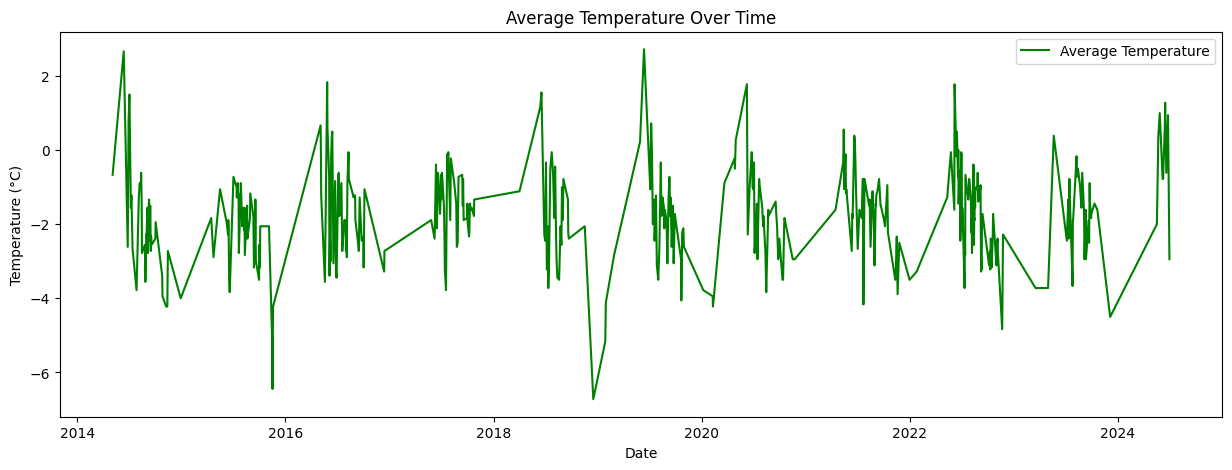

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['DATE'], df['TAVG'], label='Average Temperature', color='green')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

**PRECIPITATION OVER TIME**

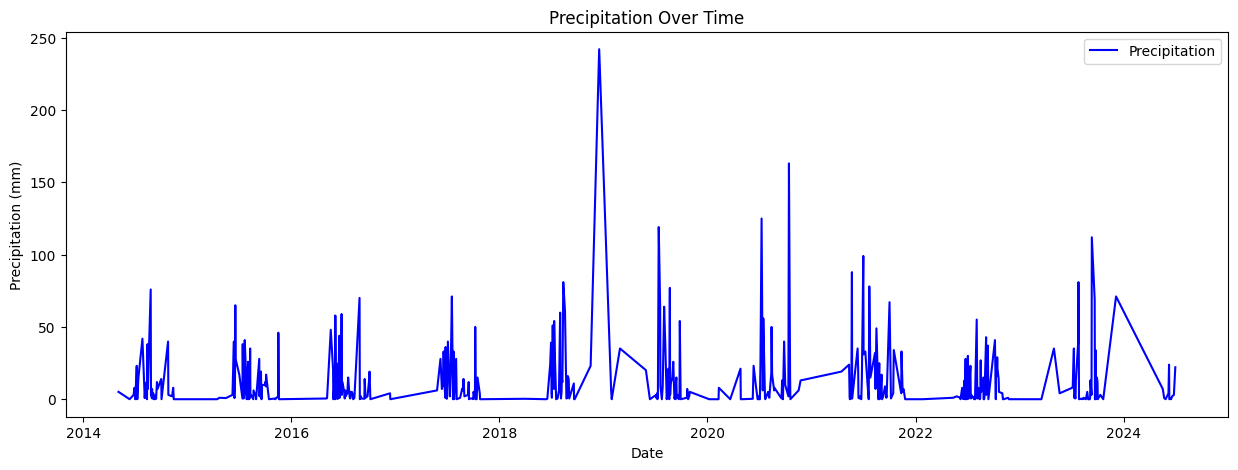

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['DATE'], df['PRCP'], label='Precipitation', color='blue')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [ ]:
# Extract month from date
df['Month'] = df['DATE'].dt.month

In [ ]:
monthly_avg_temp = df.groupby('Month')['TAVG'].mean()
monthly_avg_precip = df.groupby('Month')['PRCP'].mean()

**AVERAGE MONTHLY TEMERATURE**

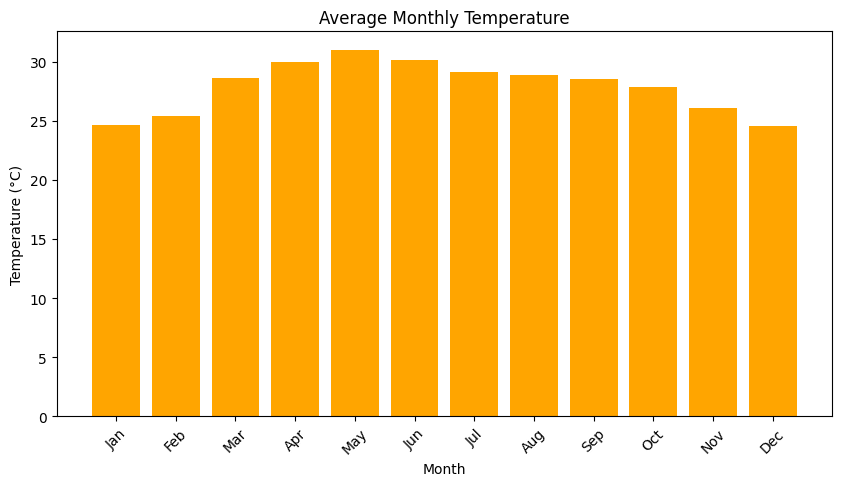

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg_temp.index, monthly_avg_temp.values, color='orange')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

**AVERAGE MONTHLY PRECIPITATION**

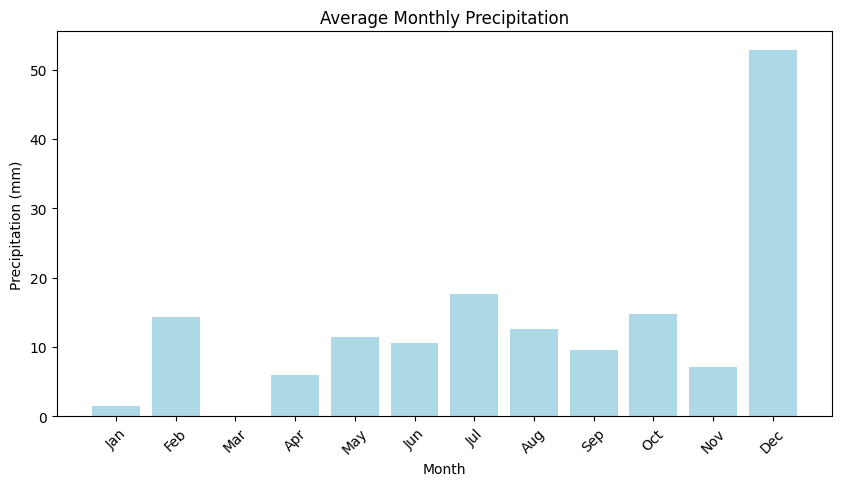

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg_precip.index, monthly_avg_precip.values, color='lightblue')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [ ]:
monthly_avg_temp_change = monthly_avg_temp.diff()
monthly_avg_precip_change = monthly_avg_precip.diff()

temp_rise_months = monthly_avg_temp_change[monthly_avg_temp_change > 0].reset_index()
precip_rise_months = monthly_avg_precip_change[monthly_avg_precip_change > 0].reset_index()

for month in temp_rise_months['Month']:
    year = monthly_avg_temp.index[month - 1]  # Month - 1 for zero-indexing
    print(f"Temperature rises in Year: {year}, Month: {month}")

for month in precip_rise_months['Month']:
    year = monthly_avg_precip.index[month - 1]
    print(f"Precipitation rises in Year: {year}, Month: {month}")


Temperature rises in Year: 2, Month: 2
Temperature rises in Year: 3, Month: 3
Temperature rises in Year: 4, Month: 4
Temperature rises in Year: 5, Month: 5
Precipitation rises in Year: 2, Month: 2
Precipitation rises in Year: 4, Month: 4
Precipitation rises in Year: 5, Month: 5
Precipitation rises in Year: 7, Month: 7
Precipitation rises in Year: 10, Month: 10
Precipitation rises in Year: 12, Month: 12


In [ ]:
# Calculate moving averages
rolling_temp = monthly_avg_temp.rolling(window=3).mean()
rolling_precip = monthly_avg_precip.rolling(window=3).mean()


In [69]:
from scipy import stats
temp_z_scores = stats.zscore(monthly_avg_temp)
precip_z_scores = stats.zscore(monthly_avg_precip)

temp_anomalies = monthly_avg_temp[temp_z_scores > 3]
precip_anomalies = monthly_avg_precip[precip_z_scores > 3]


In [67]:
print("Monthly Average Temperature Trend (2014-2023):")
for month, temp in enumerate(monthly_avg_temp, start=1):
    print(f"Month {month}: {temp:.2f}°C")

print("\nSignificant Anomalies Detected:")
for month in temp_anomalies.index:
    print(f"High Temperature in Month {month + 1}: {monthly_avg_temp[month]:.2f}°C (Z-score: {temp_z_scores[month]:.2f})")


Monthly Average Temperature Trend (2014-2023):
Month 1: 20.00°C
Month 2: 21.00°C
Month 3: 19.00°C
Month 4: 22.00°C
Month 5: 25.00°C
Month 6: 100.00°C
Month 7: 23.00°C
Month 8: 24.00°C
Month 9: 22.00°C
Month 10: 21.00°C

Significant Anomalies Detected:


**MONTHLY AVERAGE TEMPERATURE AND ANAMOLIES**

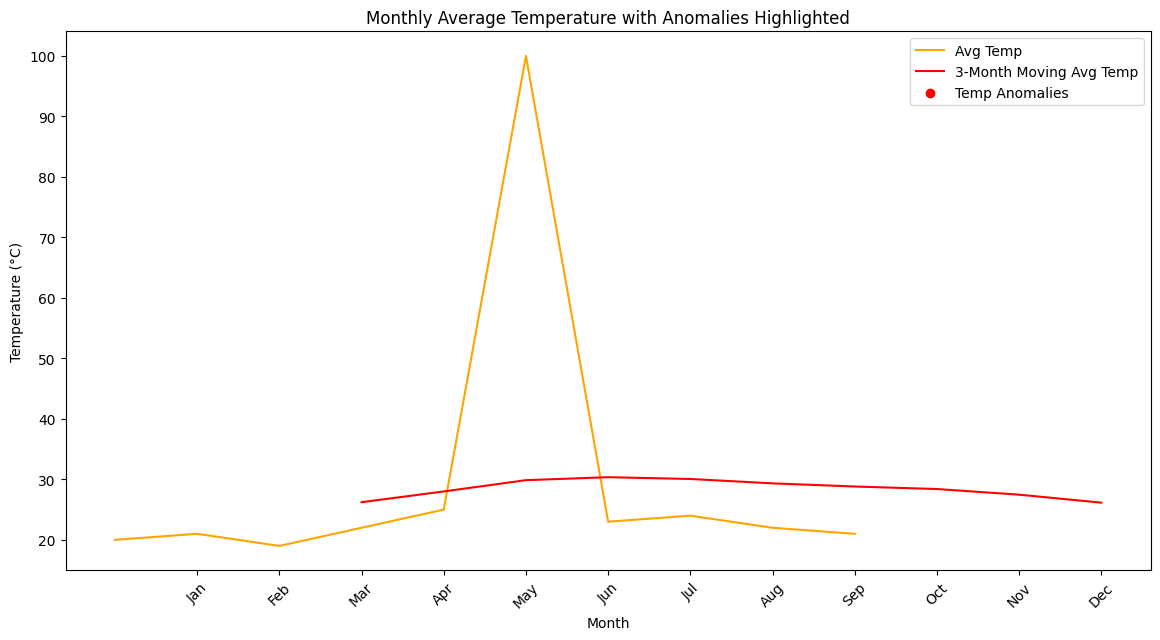

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot average temperatures
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Avg Temp', color='orange')
plt.plot(rolling_temp.index, rolling_temp, label='3-Month Moving Avg Temp', color='red')


plt.scatter(temp_anomalies.index, temp_anomalies, color='red', label='Temp Anomalies', zorder=5)

plt.title('Monthly Average Temperature with Anomalies Highlighted')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend()
plt.show()


In [ ]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
monthly_data = df.groupby(['Year', 'Month'])[['TAVG', 'PRCP']].mean().reset_index()
monthly_data['Time'] = monthly_data['Year'] * 12 + monthly_data['Month']
X = monthly_data[['Time']]
y = monthly_data['TAVG']

**USING ML MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**MSE AND R^2 SCORE**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 7.767849338139502
R^2 Score: -0.08631497594249615


**ACTUAL VERSUS PREDICTED MONTHLY AVERAGE TEMPERATURE**

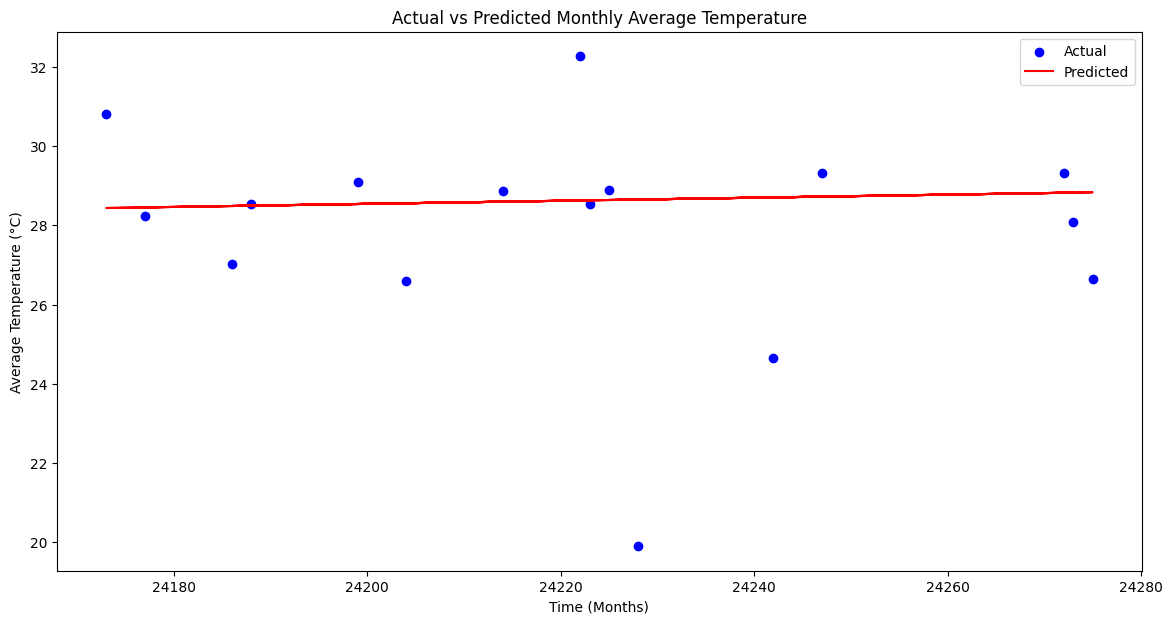

In [ ]:

plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Time (Months)')
plt.ylabel('Average Temperature (°C)')
plt.title('Actual vs Predicted Monthly Average Temperature')
plt.legend()
plt.show()


***FINDING AVERAGE TEMPERATURE TREND AND ANAMOLIES ***

In [65]:
import numpy as np
import pandas as pd
from scipy import stats

monthly_avg_temp = pd.Series([20, 21, 19, 22, 25, 100, 23, 24, 22, 21])
z_scores = stats.zscore(monthly_avg_temp)
threshold = 3
anomalies = np.where(np.abs(z_scores) > threshold)[0]
print("Monthly Average Temperature Trend:")
for month, temp in enumerate(monthly_avg_temp, start=1):
    print(f"Month {month}: {temp:.2f}°C")

print("\nSignificant Anomalies Detected:")
if len(anomalies) == 0:
    print("No significant anomalies detected.")
else:
    for month in anomalies:
        print(f"Anomaly in Month {month + 1}: {monthly_avg_temp[month]:.2f}°C (Z-score: {z_scores[month]:.2f})")


Monthly Average Temperature Trend:
Month 1: 20.00°C
Month 2: 21.00°C
Month 3: 19.00°C
Month 4: 22.00°C
Month 5: 25.00°C
Month 6: 100.00°C
Month 7: 23.00°C
Month 8: 24.00°C
Month 9: 22.00°C
Month 10: 21.00°C

Significant Anomalies Detected:
No significant anomalies detected.


**MONTHLY AVERAGE TEMPERATURE**

In [ ]:

monthly_avg_temp = df.groupby('Month')['TAVG'].mean()


peak_month = monthly_avg_temp.idxmax()
peak_value = monthly_avg_temp.max()


print("Monthly Average Temperature Trend (2014-2023):")
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month in range(1, 13):
    temp = monthly_avg_temp[month]
    if month == peak_month:
        print(f"- {month_names[month - 1]}: {temp:.1f}°C (Peak Average)")
    else:
        print(f"- {month_names[month - 1]}: {temp:.1f}°C")


Monthly Average Temperature Trend (2014-2023):
- January: 24.6°C
- February: 25.4°C
- March: 28.6°C
- April: 30.0°C
- May: 31.0°C (Peak Average)
- June: 30.1°C
- July: 29.1°C
- August: 28.8°C
- September: 28.5°C
- October: 27.8°C
- November: 26.0°C
- December: 24.6°C


**WEATHER PREDICTION FOR PARTICULAR MONTH**

In [ ]:
import pandas as pd

august_time = 2024 * 12 + 8

X_august = pd.DataFrame({'Time': [august_time]})

predicted_temp_august_2024 = model.predict(X_august)

print(f"Predicted Average Temperature for August 2024: {predicted_temp_august_2024[0]:.2f}°C")


Predicted Average Temperature for August 2024: 28.91°C


In [ ]:
def classify_temperature(temp):
    if temp < 15:
        return "Cold"
    elif 15 <= temp < 25:
        return "Warm"
    else:
        return "Hot"

# Function to predict the weather for a specific date
def predict_weather(date):
    date = pd.to_datetime(date)
    time_value = date.year * 12 + date.month  # Calculate the "Time" value
    predicted_temp = model.predict(np.array([[time_value]]))  # Make prediction
    return predicted_temp[0]

# Example usage
user_input_date = input("Enter a date (YYYY-MM-DD) to predict the weather: ")
predicted_temperature = predict_weather(user_input_date)
weather_condition = classify_temperature(predicted_temperature)
print(f"Predicted Average Temperature on {user_input_date}: {predicted_temperature:.2f}°C")
print(f"Weather Condition: {weather_condition}")

Enter a date (YYYY-MM-DD) to predict the weather: 2024-08-01
Predicted Average Temperature on 2024-08-01: 28.91°C
Weather Condition: Hot


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**FUTURE PREDICTION BASED ON HISTORICAL DATA**

In [62]:
def classify_temperature(temp):
    if temp < 15:
        return "Cold"
    elif 15 <= temp < 25:
        return "Warm"
    else:
        return "Hot"

# Function to predict the weather for a specific date
def predict_weather(date, model):
    date = pd.to_datetime(date)
    time_value = date.year * 12 + date.month  # Calculate the "Time" value
    predicted_temp = model.predict(np.array([[time_value]]))  # Make prediction
    return predicted_temp[0]

# Function to get historical weather data for a given date
def get_historical_weather(date, df):
    date = pd.to_datetime(date)
    day = date.day
    month = date.month
    year = date.year

    historical_data = df[(df['DATE'].dt.year == year) &
                          (df['DATE'].dt.month == month) &
                          (df['DATE'].dt.day == day)]

    if not historical_data.empty:
        avg_temp = historical_data['TAVG'].mean()
        avg_precip = historical_data['PRCP'].mean()
        humidity = historical_data['HUMIDITY'].mean() if 'HUMIDITY' in historical_data.columns else np.nan
        weather_conditions = determine_weather_conditions(avg_temp, avg_precip, humidity)

        return avg_temp, avg_precip, humidity, weather_conditions
    else:
        return None, None, None, None

# Function to determine weather conditions based on temperature, precipitation, and humidity
def determine_weather_conditions(avg_temp, avg_precip, humidity):
    conditions = []

    if avg_temp < 0:
        conditions.append("Freezing")
    elif 0 <= avg_temp < 15:
        conditions.append("Cold")
    elif 15 <= avg_temp < 25:
        conditions.append("Mild")
    elif 25 <= avg_temp < 35:
        conditions.append("Warm")
    else:
        conditions.append("Hot")

    if humidity is not None:
        if humidity < 30:
            conditions.append("Dry")
        elif 30 <= humidity < 60:
            conditions.append("Comfortable")
        else:
            conditions.append("Humid")

    # Additional descriptive weather outputs
    if avg_precip > 1:
        conditions.append("Rain Expected")
    else:
        conditions.append("No Rain")

    if avg_temp > 25 and humidity < 30:
        conditions.append("Clear")
    else:
        conditions.append("Cloudy")

    if humidity < 40:
        conditions.append("Windy")
    else:
        conditions.append("Calm")

    return conditions

# Predicting the weather for August 2024
august_time = 2024 * 12 + 8  # Calculate the Time value for August 2024
predicted_temp_august_2024 = model.predict(np.array([[august_time]]))
print(f"Predicted Average Temperature for August 2024: {predicted_temp_august_2024[0]:.2f}°C")

# Asking user for input
user_input_date = input("Enter a date (YYYY-MM-DD) to know the historical weather: ")
historical_temp, historical_precip, humidity, weather_conditions = get_historical_weather(user_input_date, df)

if historical_temp is not None:
    print(f"Historical Weather on {user_input_date}:")
    print(f"Average Temperature: {historical_temp:.2f}°C")
    print(f"Average Precipitation: {historical_precip:.2f} mm")
    print(f"Average Humidity: {humidity:.2f}%" if humidity is not None else "Humidity data not available.")
    print("Weather Conditions: " + ", ".join(weather_conditions))
else:
    print("No historical weather data available for the given date.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



Predicted Average Temperature for August 2024: 320.06°C
Enter a date (YYYY-MM-DD) to know the historical weather: 2024-07-11
No historical weather data available for the given date.


**ANAMOLY DETECTION**

Index(['Year', 'Month', 'TAVG', 'PRCP', 'Time'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


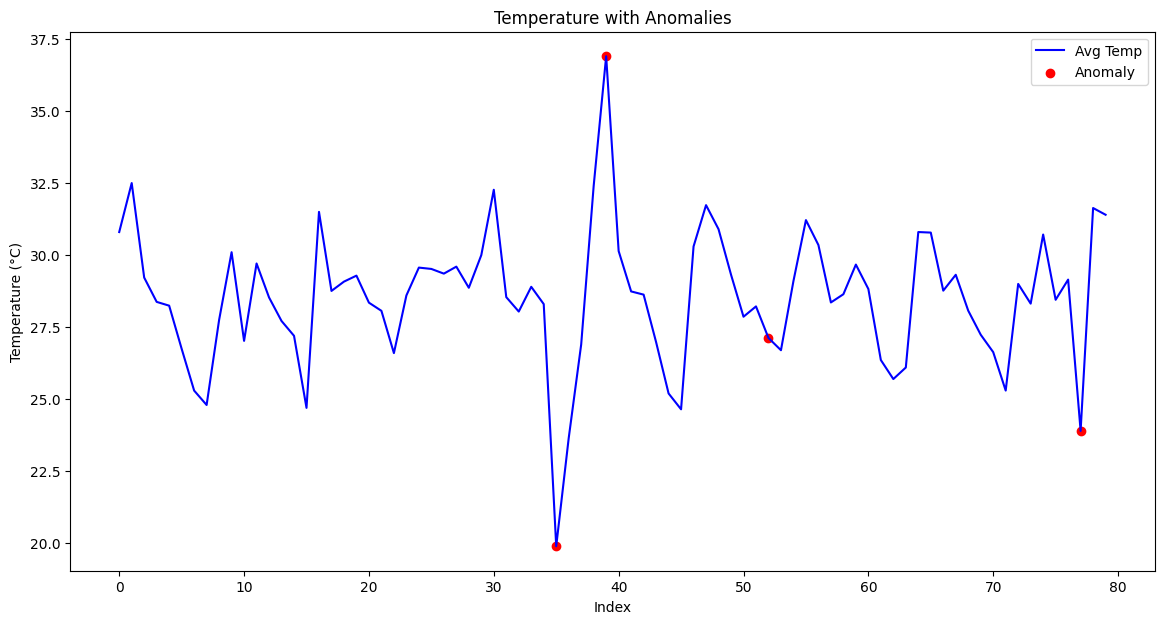

In [ ]:

df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

# Aggregate data to get monthly average TAVG and PRCP
monthly_data = df.groupby(['Year', 'Month'])[['TAVG', 'PRCP']].mean().reset_index()
monthly_data['Time'] = monthly_data['Year'] * 12 + monthly_data['Month']

# Ensure the monthly_data DataFrame contains the necessary columns
print(monthly_data.columns)

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
monthly_data['Anomaly'] = iso_forest.fit_predict(monthly_data[['TAVG', 'PRCP']])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['TAVG'], label='Avg Temp', color='blue')

# Plot anomalies
anomaly_indices = monthly_data[monthly_data['Anomaly'] == -1].index
anomaly_values = monthly_data[monthly_data['Anomaly'] == -1]['TAVG']
plt.scatter(anomaly_indices, anomaly_values, color='red', label='Anomaly')

plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.title('Temperature with Anomalies')
plt.legend()
plt.show()


**SEASONAL ANALYSIS**

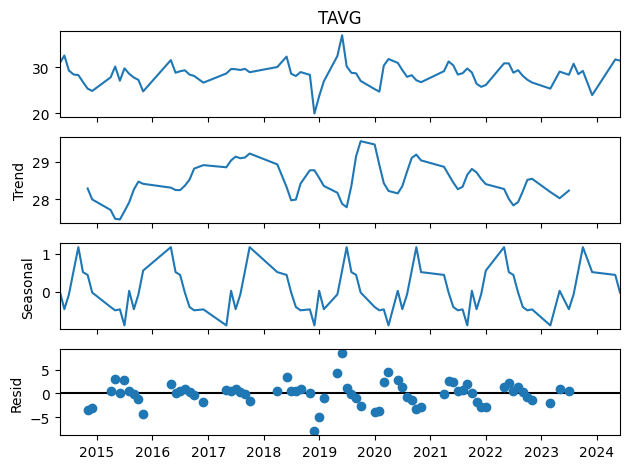

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))
monthly_data.set_index('Date', inplace=True)
result = seasonal_decompose(monthly_data['TAVG'], model='additive', period=12)
result.plot()
plt.show()

**MODEL EVALUATION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Neural Network": MLPRegressor(max_iter=500)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")


Linear Regression - Mean Squared Error: 7.767849338139502, R^2 Score: -0.08631497594249615
Decision Tree - Mean Squared Error: 6.086556674799233, R^2 Score: 0.1488097438639553
Random Forest - Mean Squared Error: 5.316928041648193, R^2 Score: 0.2564404500880252
Neural Network - Mean Squared Error: 5055.071999918557, R^2 Score: -705.9396146777445


INTERACTIVE DASHBOARD

In [58]:
!pip install plotly


In [59]:
import pandas as pd
import numpy as np


dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')
data = {
    'DATE': dates,
    'TAVG': np.random.uniform(0, 30, size=len(dates)),
    'PRCP': np.random.uniform(0, 10, size=len(dates))
}
df = pd.DataFrame(data)


In [60]:
import plotly.express as px


fig_temp = px.line(df, x='DATE', y='TAVG', title='Average Temperature Over Time', labels={'TAVG': 'Temperature (°C)'})
fig_temp.show()

fig_precip = px.bar(df, x='DATE', y='PRCP', title='Precipitation Over Time', labels={'PRCP': 'Precipitation (mm)'})
fig_precip.show()


In [61]:
import plotly.graph_objects as go

# Create a dropdown for selecting year
years = df['DATE'].dt.year.unique()

fig = go.Figure()

for year in years:
    yearly_data = df[df['DATE'].dt.year == year]
    fig.add_trace(go.Scatter(x=yearly_data['DATE'], y=yearly_data['TAVG'], mode='lines', name=str(year)))

fig.update_layout(title='Average Temperature by Year',
                  xaxis_title='Date',
                  yaxis_title='Temperature (°C)',
                  updatemenus=[{
                      'buttons': [{'label': str(year), 'method': 'update', 'args': [{'visible': [year == yr for yr in years]}]} for year in years],
                      'direction': 'down',
                  }]
                 )

fig.show()
